In [44]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [14]:
# MAIN_GOAL: grouping buildings to possible see some unseen information about the data

In [15]:
df = pd.read_csv('../Data/cleaned_data/green_roofs2.csv')

df

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
0,971,14057,0.07,1900,59,90,1,BK,-73.93491,40.67389,public
1,696,4463,0.16,1900,13,21,0,MN,-73.99982,40.73481,commercial
2,293,13217,0.02,1900,93,7,0,MN,-74.00906,40.72480,commercial
3,759,4311,0.18,1900,99,21,0,MN,-74.00836,40.71595,commercial
4,7204,35891,0.20,1990,206,10,1,BX,-73.91227,40.81906,commercial
...,...,...,...,...,...,...,...,...,...,...,...
725,1525,6414,0.24,1800,104,6,0,MN,-74.00968,40.72554,residential
726,343,2941,0.12,1990,118,42,1,MN,-73.99311,40.72600,public
727,309,4350,0.07,1990,175,18,1,MN,-74.01044,40.71474,industrial
728,8139,20051,0.41,1960,23,12,0,MN,-73.93708,40.79703,commercial


In [16]:
df.describe()

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,xcoord,ycoord
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,3060.008219,22724.094521,0.178466,1943.232877,142.563014,41.479452,0.212329,-73.966182,40.745905
std,6059.135823,31208.241425,0.171618,42.802549,148.077963,33.204033,0.409237,0.045822,0.053641
min,10.000000,522.000000,0.000000,1800.000000,8.000000,-4.000000,0.000000,-74.077320,40.572220
25%,438.750000,4319.000000,0.060000,1900.000000,51.000000,15.000000,0.000000,-73.996075,40.717370
50%,1171.500000,12143.000000,0.120000,1930.000000,85.500000,32.000000,0.000000,-73.978630,40.741695
75%,3121.750000,27632.000000,0.230000,1990.000000,184.000000,61.000000,0.000000,-73.950568,40.773907
max,66025.000000,280739.000000,0.980000,1990.000000,1408.000000,168.000000,1.000000,-73.751320,40.896350


In [17]:
df.columns

Index(['green_roof_area', 'building_area', 'ratio_green_area',
       'construction_year', 'roof_height', 'ground_elev', 'digitized',
       'borough', 'xcoord', 'ycoord', 'area_type'],
      dtype='object')

In [18]:
# to have the same display like in the last models
#this time we will encode the categoricals with one hot encoder

df = df[['building_area', 'ratio_green_area','roof_height', 'ground_elev',\
    'xcoord', 'ycoord','borough','construction_year','digitized','area_type', 'green_roof_area' ]]

df

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area
0,14057,0.07,59,90,-73.93491,40.67389,BK,1900,1,public,971
1,4463,0.16,13,21,-73.99982,40.73481,MN,1900,0,commercial,696
2,13217,0.02,93,7,-74.00906,40.72480,MN,1900,0,commercial,293
3,4311,0.18,99,21,-74.00836,40.71595,MN,1900,0,commercial,759
4,35891,0.20,206,10,-73.91227,40.81906,BX,1990,1,commercial,7204
...,...,...,...,...,...,...,...,...,...,...,...
725,6414,0.24,104,6,-74.00968,40.72554,MN,1800,0,residential,1525
726,2941,0.12,118,42,-73.99311,40.72600,MN,1990,1,public,343
727,4350,0.07,175,18,-74.01044,40.71474,MN,1990,1,industrial,309
728,20051,0.41,23,12,-73.93708,40.79703,MN,1960,0,commercial,8139


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   building_area      730 non-null    int64  
 1   ratio_green_area   730 non-null    float64
 2   roof_height        730 non-null    int64  
 3   ground_elev        730 non-null    int64  
 4   xcoord             730 non-null    float64
 5   ycoord             730 non-null    float64
 6   borough            730 non-null    object 
 7   construction_year  730 non-null    int64  
 8   digitized          730 non-null    int64  
 9   area_type          730 non-null    object 
 10  green_roof_area    730 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 62.9+ KB


In [20]:
# we want that the construction_year and digitizes to be categoricals

df['construction_year'] = df['construction_year'].apply(str)
df['digitized'] = df['digitized'].apply(str)

In [24]:
#TRANSFORMING NUMERICALS

num = df.select_dtypes([np.number])
num

transformer = StandardScaler()
transformer.fit(num)
num_scaled_1 = transformer.transform(num)
num_scaled = pd.DataFrame(num_scaled_1, columns = num.columns)
num_scaled


,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,green_roof_area
0,-0.277909,-0.632451,-0.564705,1.462287,0.682931,-1.343473,-0.345006
1,-0.585538,-0.107672,-0.875565,-0.617199,-0.734621,-0.206986,-0.390424
2,-0.304843,-0.923996,-0.334938,-1.039124,-0.936411,-0.393727,-0.456980
3,-0.590412,0.008946,-0.294391,-0.617199,-0.921124,-0.558827,-0.380019
4,0.422194,0.125564,0.428696,-0.948711,1.177359,1.364731,0.684393
...,...,...,...,...,...,...,...
725,-0.522980,0.358799,-0.260602,-1.069261,-0.949951,-0.379922,-0.253512
726,-0.634341,-0.340907,-0.165993,0.015688,-0.588083,-0.371340,-0.448723
727,-0.589161,-0.632451,0.219204,-0.707611,-0.966549,-0.581400,-0.454338
728,-0.085712,1.350050,-0.807986,-0.888436,0.635540,0.953753,0.838812


In [31]:
#TRANSFORMING CATEGORICALS

cat = df.select_dtypes(['object'])
cat

encoder = OneHotEncoder()
cat_enc_1 = encoder.fit_transform(cat).toarray()
cat_enc = pd.DataFrame(cat_enc_1, columns = encoder.get_feature_names_out())
cat_enc


,borough_BK,borough_BX,borough_MN,borough_QN,borough_SI,construction_year_1800,construction_year_1850,construction_year_1900,construction_year_1930,construction_year_1960,construction_year_1990,digitized_0,digitized_1,area_type_commercial,area_type_industrial,area_type_public,area_type_residential
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
726,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
728,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [34]:
df_treated = pd.concat([num_scaled, cat_enc], axis = 1)
df_treated

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,green_roof_area,borough_BK,borough_BX,borough_MN,...,construction_year_1900,construction_year_1930,construction_year_1960,construction_year_1990,digitized_0,digitized_1,area_type_commercial,area_type_industrial,area_type_public,area_type_residential
0,-0.277909,-0.632451,-0.564705,1.462287,0.682931,-1.343473,-0.345006,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.585538,-0.107672,-0.875565,-0.617199,-0.734621,-0.206986,-0.390424,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.304843,-0.923996,-0.334938,-1.039124,-0.936411,-0.393727,-0.456980,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.590412,0.008946,-0.294391,-0.617199,-0.921124,-0.558827,-0.380019,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.422194,0.125564,0.428696,-0.948711,1.177359,1.364731,0.684393,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-0.522980,0.358799,-0.260602,-1.069261,-0.949951,-0.379922,-0.253512,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
726,-0.634341,-0.340907,-0.165993,0.015688,-0.588083,-0.371340,-0.448723,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
727,-0.589161,-0.632451,0.219204,-0.707611,-0.966549,-0.581400,-0.454338,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
728,-0.085712,1.350050,-0.807986,-0.888436,0.635540,0.953753,0.838812,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
df_treated.isna().sum() # concat went well

building_area             0
ratio_green_area          0
roof_height               0
ground_elev               0
xcoord                    0
ycoord                    0
green_roof_area           0
borough_BK                0
borough_BX                0
borough_MN                0
borough_QN                0
borough_SI                0
construction_year_1800    0
construction_year_1850    0
construction_year_1900    0
construction_year_1930    0
construction_year_1960    0
construction_year_1990    0
digitized_0               0
digitized_1               0
area_type_commercial      0
area_type_industrial      0
area_type_public          0
area_type_residential     0
dtype: int64

In [40]:
# checking the best  k

K = range(2,12)

inertia = []
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 19, verbose = 1)
    kmeans.fit(df_treated)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_treated, kmeans.predict(df_treated)))



C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 8943.424156641595.
Iteration 1, inertia 6123.943647346197.
Iteration 2, inertia 6054.700041035991.
Iteration 3, inertia 6006.795294033626.
Iteration 4, inertia 5937.1473208235475.
Iteration 5, inertia 5887.25371487215.
Iteration 6, inertia 5868.075360332559.
Iteration 7, inertia 5859.730006143674.
Iteration 8, inertia 5858.52707760638.
Iteration 9, inertia 5857.231054250864.
Iteration 10, inertia 5856.626784191065.
Iteration 11, inertia 5856.5292373704315.
Iteration 12, inertia 5856.484929625346.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 8254.57998816859.
Iteration 1, inertia 6308.83839770307.
Iteration 2, inertia 6224.789546122434.
Iteration 3, inertia 6196.312014826228.
Iteration 4, inertia 6193.482374935102.
Iteration 5, inertia 6186.357478995989.
Iteration 6, inertia 6180.032414313089.
Iteration 7, inertia 6175.51389937855.
Iteration 8, inertia 6171.799780352949.
Iteration 9, inertia 6170

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 10, inertia 5210.977153808031.
Iteration 11, inertia 5206.786444970237.
Iteration 12, inertia 5206.018271931756.
Iteration 13, inertia 5205.87615790991.
Iteration 14, inertia 5205.848374204097.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 8144.704769690158.
Iteration 1, inertia 5529.822954775351.
Iteration 2, inertia 5344.019914799508.
Iteration 3, inertia 5273.92290894439.
Iteration 4, inertia 5237.375539953105.
Iteration 5, inertia 5206.935310961375.
Iteration 6, inertia 5194.645430088001.
Iteration 7, inertia 5192.085416119724.
Iteration 8, inertia 5191.485591771132.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 7312.644073099631.
Iteration 1, inertia 5736.487387052658.
Iteration 2, inertia 5591.584709185393.
Iteration 3, inertia 5510.948691993467.
Iteration 4, inertia 5407.311570346478.
Iteration 5, inertia 5373.916953695513.
Iteration 6, inertia 5369.425615626932.
Iteration 7, ine

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 10, inertia 4749.655454760382.
Iteration 11, inertia 4748.215920112748.
Iteration 12, inertia 4743.38590888486.
Iteration 13, inertia 4742.584981449006.
Iteration 14, inertia 4742.377785433376.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 6973.86535071698.
Iteration 1, inertia 5059.047518830674.
Iteration 2, inertia 4947.54772922517.
Iteration 3, inertia 4898.299401794477.
Iteration 4, inertia 4846.58757115371.
Iteration 5, inertia 4809.750332195953.
Iteration 6, inertia 4780.9782656225.
Iteration 7, inertia 4760.524868565269.
Iteration 8, inertia 4748.150028508303.
Iteration 9, inertia 4739.105599305923.
Iteration 10, inertia 4737.281447038398.
Iteration 11, inertia 4735.105485146093.
Iteration 12, inertia 4731.413517006277.
Iteration 13, inertia 4730.565093101822.
Iteration 14, inertia 4730.516291626209.
Iteration 15, inertia 4730.472667437262.
Iteration 16, inertia 4730.407398107509.
Iteration 17, inertia 4730.356986460817.
It

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 11, inertia 4587.17789652786.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 7584.436126277216.
Iteration 1, inertia 4545.1129699850035.
Iteration 2, inertia 4424.849985524803.
Iteration 3, inertia 4405.043637555145.
Iteration 4, inertia 4390.564502184891.
Iteration 5, inertia 4385.60138767112.
Iteration 6, inertia 4382.368736068398.
Iteration 7, inertia 4380.016565574325.
Iteration 8, inertia 4379.498225449921.
Iteration 9, inertia 4379.3232501196235.
Iteration 10, inertia 4379.165202587763.
Iteration 11, inertia 4378.855664852957.
Iteration 12, inertia 4377.898503356774.
Iteration 13, inertia 4377.410043039915.
Iteration 14, inertia 4377.201656007203.
Iteration 15, inertia 4377.158497504641.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 6639.220559358855.
Iteration 1, inertia 4677.849066239667.
Iteration 2, inertia 4528.870142245355.
Iteration 3, inertia 4491.1933827389.
Iteration 4, 

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 4173.840779086018.
Iteration 5, inertia 4153.180429644792.
Iteration 6, inertia 4140.203811505996.
Iteration 7, inertia 4124.160253913123.
Iteration 8, inertia 4113.089083539083.
Iteration 9, inertia 4099.94235839473.
Iteration 10, inertia 4092.605958374147.
Iteration 11, inertia 4086.388300592427.
Iteration 12, inertia 4083.6567154062805.
Iteration 13, inertia 4081.316696767028.
Iteration 14, inertia 4080.838207925632.
Iteration 15, inertia 4080.168803061384.
Iteration 16, inertia 4079.681966307079.
Iteration 17, inertia 4079.1301400444677.
Iteration 18, inertia 4078.831005327977.
Iteration 19, inertia 4078.1064242549573.
Iteration 20, inertia 4077.614478440238.
Iteration 21, inertia 4077.2348583499033.
Iteration 22, inertia 4076.363581895619.
Iteration 23, inertia 4075.910512536797.
Iteration 24, inertia 4074.756331853441.
Iteration 25, inertia 4071.480546741898.
Iteration 26, inertia 4064.69031979831.
Iteration 27, inertia 4049.6767890730516.
Iteration 28, inert

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 5920.858176676096.
Iteration 1, inertia 4283.730483681474.
Iteration 2, inertia 4090.333828956777.
Iteration 3, inertia 4037.532805146229.
Iteration 4, inertia 4022.229030462607.
Iteration 5, inertia 4009.7503179110918.
Iteration 6, inertia 3994.3406635537654.
Iteration 7, inertia 3987.546317298108.
Iteration 8, inertia 3980.284547556006.
Iteration 9, inertia 3973.678305453631.
Iteration 10, inertia 3965.2580441930777.
Iteration 11, inertia 3958.3472193339258.
Iteration 12, inertia 3950.390986045102.
Iteration 13, inertia 3941.7603778892235.
Iteration 14, inertia 3933.9373414798383.
Iteration 15, inertia 3926.172695663129.
Iteration 16, inertia 3916.7050185402272.
Iteration 17, inertia 3908.2673623140417.
Iteration 18, inertia 3897.1725421721367.
Iteration 19, inertia 3884.4611761265924.
Iteration 20, inertia 3873.953447178501.
Iteration 21, inertia 3865.901236624719.
Iteration 22, inertia 3855.067915184551.
Iteration 23, inertia 3849.209797

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 17, inertia 3653.5759790658967.
Iteration 18, inertia 3653.25205271238.
Iteration 19, inertia 3652.6922885432223.
Iteration 20, inertia 3652.485445954675.
Iteration 21, inertia 3651.893565994463.
Iteration 22, inertia 3651.638241001244.
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 5511.703126900702.
Iteration 1, inertia 3974.6391931481594.
Iteration 2, inertia 3839.817645600927.
Iteration 3, inertia 3796.3974131492037.
Iteration 4, inertia 3781.708729974557.
Iteration 5, inertia 3770.2521083918173.
Iteration 6, inertia 3752.409272979903.
Iteration 7, inertia 3738.7634542189517.
Iteration 8, inertia 3725.2972759601994.
Iteration 9, inertia 3706.939398629354.
Iteration 10, inertia 3678.365025737779.
Iteration 11, inertia 3664.5590093159835.
Iteration 12, inertia 3655.2873570883444.
Iteration 13, inertia 3645.85478772921.
Iteration 14, inertia 3640.508102192299.
Iteration 15, inertia 3637.5901123382037.
Iteration 16, inertia 3635.73

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 9, inertia 3539.511831616477.
Iteration 10, inertia 3537.2155100439745.
Iteration 11, inertia 3533.100209894915.
Iteration 12, inertia 3525.889045871244.
Iteration 13, inertia 3521.034079310798.
Iteration 14, inertia 3514.269390295742.
Iteration 15, inertia 3509.6958926777165.
Iteration 16, inertia 3506.1111343927328.
Iteration 17, inertia 3504.6770605872393.
Iteration 18, inertia 3504.431292255861.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 5150.40070934301.
Iteration 1, inertia 3814.110248261059.
Iteration 2, inertia 3670.2492343040904.
Iteration 3, inertia 3583.944406510756.
Iteration 4, inertia 3545.8973515404095.
Iteration 5, inertia 3528.7151244101533.
Iteration 6, inertia 3511.8814829724747.
Iteration 7, inertia 3508.273425890161.
Iteration 8, inertia 3504.8712439385977.
Iteration 9, inertia 3501.5950750785155.
Iteration 10, inertia 3499.195987107414.
Iteration 11, inertia 3494.585926983204.
Iteration 12, inertia 3482.90

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 3510.2583873093713.
Iteration 5, inertia 3495.4273268647025.
Iteration 6, inertia 3485.379896094813.
Iteration 7, inertia 3477.8228859474516.
Iteration 8, inertia 3473.021033466454.
Iteration 9, inertia 3469.695873447089.
Iteration 10, inertia 3466.8257243071675.
Iteration 11, inertia 3465.511511651883.
Iteration 12, inertia 3464.6646060506864.
Iteration 13, inertia 3462.7919206076263.
Iteration 14, inertia 3457.27685113733.
Iteration 15, inertia 3452.7587343381874.
Iteration 16, inertia 3450.7407987017286.
Iteration 17, inertia 3446.9042957532297.
Iteration 18, inertia 3440.186900531284.
Iteration 19, inertia 3423.4743183042274.
Iteration 20, inertia 3403.6585097293796.
Iteration 21, inertia 3400.8808733336946.
Iteration 22, inertia 3394.6864293603376.
Iteration 23, inertia 3391.222374869867.
Iteration 24, inertia 3387.603375826798.
Iteration 25, inertia 3385.929478113123.
Iteration 26, inertia 3385.591390739456.
Iteration 27, inertia 3384.8461540790586.
Iteration

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 28, inertia 3237.3154055735013.
Iteration 29, inertia 3235.7810579269126.
Iteration 30, inertia 3234.531186533106.
Iteration 31, inertia 3234.1357195368.
Iteration 32, inertia 3232.9871415092584.
Iteration 33, inertia 3232.0478386229393.
Iteration 34, inertia 3230.705523585917.
Iteration 35, inertia 3228.966516378097.
Iteration 36, inertia 3226.7732715193065.
Iteration 37, inertia 3223.1787918132745.
Iteration 38, inertia 3218.7517912794283.
Iteration 39, inertia 3214.4437195156497.
Iteration 40, inertia 3212.525147639748.
Iteration 41, inertia 3210.3439532787233.
Iteration 42, inertia 3210.043525021507.
Converged at iteration 42: strict convergence.
Initialization complete
Iteration 0, inertia 4879.910790828995.
Iteration 1, inertia 3632.185173642059.
Iteration 2, inertia 3474.370652544735.
Iteration 3, inertia 3401.496565961056.
Iteration 4, inertia 3319.5594331230614.
Iteration 5, inertia 3248.886132352916.
Iteration 6, inertia 3227.8255145304206.
Iteration 7, inertia 3220

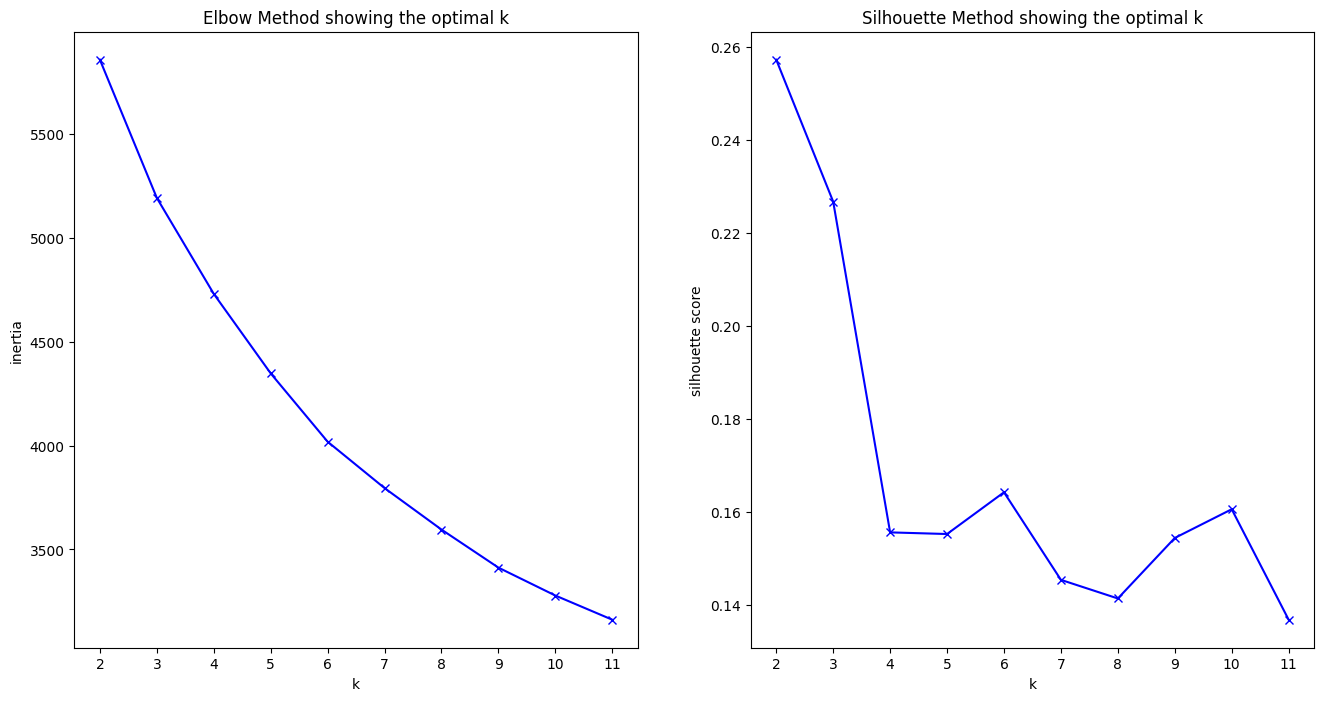

In [45]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')
plt.show()



In [47]:
number_of_clusters = list(np.arange(2,12))
number_of_clusters
silhouette

df_silhouete_number_of_clusters = pd.DataFrame(silhouette,number_of_clusters, columns=['nr_of_clusters[K]''silhouette'])
df_silhouete_number_of_clusters

,nr_of_clusters[K]silhouette
2,0.257178
3,0.226684
4,0.155649
5,0.155296
6,0.164263
7,0.145449
8,0.141451
9,0.154451
10,0.160620
11,0.136887


In [ ]:
# the best k is 6. 10 is to much for our purpose, we want to search for trends and groups of
    #buildings or green roofs
    #in other way, k = 3 is a group to little to our goals

In [49]:
#Clustering

kmeans_6 = KMeans(n_clusters = 6, random_state = 19)
kmeans_6.fit(df_treated)

clusters6 = kmeans_6.predict(df_treated)
pd.Series(clusters6).value_counts().sort_index()


C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     12
1     30
2    117
3    325
4    122
5    124
dtype: int64

In [51]:
df['clusters_6'] = clusters6
df

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
0,14057,0.07,59,90,-73.93491,40.67389,BK,1900,1,public,971,4
1,4463,0.16,13,21,-73.99982,40.73481,MN,1900,0,commercial,696,3
2,13217,0.02,93,7,-74.00906,40.72480,MN,1900,0,commercial,293,3
3,4311,0.18,99,21,-74.00836,40.71595,MN,1900,0,commercial,759,3
4,35891,0.20,206,10,-73.91227,40.81906,BX,1990,1,commercial,7204,2
...,...,...,...,...,...,...,...,...,...,...,...,...
725,6414,0.24,104,6,-74.00968,40.72554,MN,1800,0,residential,1525,3
726,2941,0.12,118,42,-73.99311,40.72600,MN,1990,1,public,343,3
727,4350,0.07,175,18,-74.01044,40.71474,MN,1990,1,industrial,309,3
728,20051,0.41,23,12,-73.93708,40.79703,MN,1960,0,commercial,8139,2


In [58]:
# checking some patterns in the clusters

cluster0_df = df[df['clusters_6']==0]

df[df['clusters_6']==0].sample(5)



,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
215,41670,0.65,87,27,-73.92535,40.75194,QN,1900,1,industrial,27247,0
549,65005,0.64,142,12,-73.97255,40.69840,BK,1930,1,commercial,41338,0
447,94646,0.30,216,51,-73.98944,40.77076,MN,1990,0,industrial,28669,0
67,63467,0.40,35,14,-73.92309,40.79931,MN,1990,1,industrial,25420,0
10,152909,0.36,179,90,-73.98513,40.77092,MN,1930,0,commercial,54774,0


In [59]:
cluster1_df = df[df['clusters_6']==1]

df[df['clusters_6']==1].sample(5)

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
507,47591,0.13,239,7,-73.75220,40.59428,QN,1960,0,industrial,5957,1
281,16739,0.05,104,65,-73.79145,40.70907,QN,1960,0,residential,888,1
526,50858,0.04,47,21,-73.86328,40.73269,QN,1990,0,residential,2176,1
397,87601,0.15,117,14,-73.82138,40.58584,QN,1960,0,commercial,13282,1
270,162276,0.05,79,13,-73.83997,40.77192,QN,1990,0,commercial,8915,1


In [60]:
cluster2_df = df[df['clusters_6']==2]

df[df['clusters_6']==2].sample(5)

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
390,11516,0.02,98,137,-73.96146,40.80661,MN,1900,0,industrial,249,2
131,8384,0.34,73,45,-73.89450,40.85736,BX,1990,1,residential,2810,2
139,2910,0.15,54,116,-73.89713,40.85705,BX,1930,0,industrial,437,2
73,11733,0.16,55,109,-73.89905,40.85522,BX,1900,1,residential,1914,2
380,7355,0.37,58,102,-73.90410,40.87091,BX,1990,0,industrial,2694,2


In [61]:
cluster3_df = df[df['clusters_6']==3]

df[df['clusters_6']==3].sample(5)

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
216,6098,0.11,92,12,-74.00919,40.73496,MN,1900,0,industrial,662,3
272,1696,0.13,75,11,-74.00117,40.70889,MN,1990,0,commercial,220,3
40,36935,0.12,168,8,-74.00533,40.74864,MN,1990,0,industrial,4517,3
41,14749,0.29,230,16,-74.01429,40.71660,MN,1990,1,commercial,4277,3
678,2283,0.23,92,18,-73.98384,40.72605,MN,1900,0,industrial,530,3


In [62]:
cluster4_df = df[df['clusters_6']==4]

df[df['clusters_6']==4].sample(5)

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
454,27718,0.01,67,6,-73.98996,40.57222,BK,1960,0,residential,406,4
17,50596,0.05,36,16,-73.91616,40.62928,BK,1990,1,residential,2295,4
283,9354,0.04,142,51,-73.97394,40.64907,BK,1930,0,commercial,369,4
522,885,0.54,43,77,-73.97545,40.67718,BK,1850,0,residential,475,4
520,22348,0.03,30,42,-73.95362,40.69056,BK,1930,0,commercial,773,4


In [63]:
cluster5_df = df[df['clusters_6']==5]

df[df['clusters_6']==5].sample(5)

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
151,23565,0.06,405,68,-73.98399,40.76431,MN,1990,0,residential,1496,5
89,52632,0.01,1408,5,-74.01280,40.71256,MN,1990,0,commercial,788,5
622,13346,0.06,351,61,-73.96441,40.76005,MN,1960,0,residential,737,5
169,85500,0.09,1238,50,-73.98571,40.74847,MN,1930,1,industrial,7992,5
521,58969,0.06,219,63,-73.97956,40.75826,MN,1930,0,commercial,3389,5


In [65]:
cluster0_df.to_csv('../Data/cleaned_data/clusters0.csv')
cluster1_df.to_csv('../Data/cleaned_data/clusters1.csv')
cluster2_df.to_csv('../Data/cleaned_data/clusters2.csv')
cluster3_df.to_csv('../Data/cleaned_data/clusters3.csv')
cluster4_df.to_csv('../Data/cleaned_data/clusters4.csv')
cluster5_df.to_csv('../Data/cleaned_data/clusters5.csv')



In [68]:
clusters_df = df
clusters_df.to_csv('../Data/cleaned_data/clusters_df.csv')

In [66]:
#CONCLUSION: from here we can't notice any pattern

#NEXT_STEPS:
            # Explore this new clusters data frames to find some patterns
            # reduce the K to 3 or 4
            # Do another clustering with less features
            # Do another clustering usind DBSCAN

,building_area,ratio_green_area,roof_height,ground_elev,xcoord,ycoord,borough,construction_year,digitized,area_type,green_roof_area,clusters_6
0,14057,0.07,59,90,-73.93491,40.67389,BK,1900,1,public,971,4
1,4463,0.16,13,21,-73.99982,40.73481,MN,1900,0,commercial,696,3
2,13217,0.02,93,7,-74.00906,40.72480,MN,1900,0,commercial,293,3
3,4311,0.18,99,21,-74.00836,40.71595,MN,1900,0,commercial,759,3
4,35891,0.20,206,10,-73.91227,40.81906,BX,1990,1,commercial,7204,2
...,...,...,...,...,...,...,...,...,...,...,...,...
725,6414,0.24,104,6,-74.00968,40.72554,MN,1800,0,residential,1525,3
726,2941,0.12,118,42,-73.99311,40.72600,MN,1990,1,public,343,3
727,4350,0.07,175,18,-74.01044,40.71474,MN,1990,1,industrial,309,3
728,20051,0.41,23,12,-73.93708,40.79703,MN,1960,0,commercial,8139,2
